In [24]:
# !pip uninstall tensorflow
import numpy 
import os
import glob
import pandas as pd
import librosa
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.preprocessing import image
from tensorflow.keras.models import load_model

In [25]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '-1' 

In [26]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3661908933151060126
xla_global_id: -1
]


In [27]:
# from keras import backend as K
# K.tensorflow_backend._get_available_gpus()
from tensorflow.python.client import device_lib
physical_devices = tf.config.list_physical_devices('GPU')
physical_devices

[]

# Loading data 

In [28]:
path = os.path.expanduser('~')
path=os.path.join(path, "Documents", "courses", "MLSP", "Audio_Classification-MLSP", "Audio_Classification-MLSP")
data_path=os.path.join(path, "train")
label_path=path
data=pd.read_csv(os.path.join(label_path, "annotations.csv"))
# npy_files = glob.glob(os.path.join(data_path, "*.npy"))

In [29]:
audios=[]
i=0
files=data["fname"]
for file in files:
    arr=numpy.load(os.path.join(data_path, file))
    m,n,o=arr.shape
    arr.resize(n,o)
#     print(arr.shape)
    mel_spect = librosa.power_to_db(arr, ref=numpy.median)
    audios.append(mel_spect)
    i=i+1
   

In [30]:
y=data['label']
y=numpy.array(y)
y

array(['Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark',
       'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark',
       'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark',
       'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark',
       'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark',
       'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark',
       'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark',
       'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark',
       'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark',
       'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark',
       'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark',
       'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark',
       'Bark', 'Bark', 'Bark', 'Bark', 'Meow', 'Meow', 'Meow', 'Meow',
       'Meow', 'Meow', 'Meow', 'Meow', 'Meow', 'Meow', 'Meow', 'Meow',
      

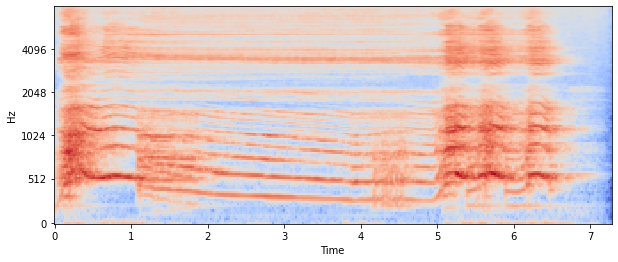

In [31]:
import librosa.display
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10, 4))
img = librosa.display.specshow(audios[0], x_axis='time', y_axis='mel', fmax=8000)
plt.savefig("out.png")
plt.show()

# Padding according to max columns in the given dataset 

In [46]:
import numpy
features=[]
maxs=0
for a in audios:
    if maxs < a.shape[1]:
        maxs=a.shape[1]
for a in audios:
    if(a.shape[1]<maxs):
        mat=numpy.pad(a, [(0, 0), (0, maxs-a[0].size)], mode='constant', constant_values=0)
        mat=mat.reshape((mat.shape[0], mat.shape[1]))
        features.append(mat)
    else:
        a=a.reshape((a.shape[0], a.shape[1]))
        features.append(a)
for i, arr in enumerate(features):
    features[i]=arr.reshape(arr.shape[0], arr.shape[1])
    print(features[i].shape)
# features=numpy.array(features)
# maxs=0


(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128, 2584)
(128

In [47]:
features[0].shape
# audios[5].shape
# print(features[0]-features[99])

(128, 2584)

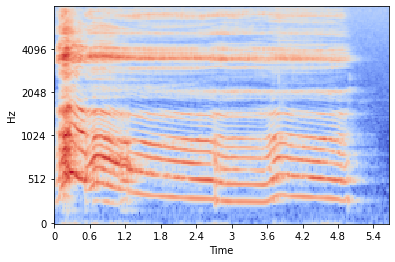

In [48]:
img = librosa.display.specshow(audios[55], x_axis='time', y_axis='mel', fmax=8000)


In [49]:
data["label"].describe()

count     1000
unique      10
top       Bark
freq       100
Name: label, dtype: object

# Reshaping to 3-D

In [50]:
final=[]
for i, feat in enumerate(features):
    final.append(feat.reshape(1, feat.shape[0], feat.shape[1]))
#     print(features[i].shape)
len(final)

1000

In [51]:
# for i, feat in enumerate(final):
#     print(feat.shape)

In [52]:
i=0
features=final
for mat in features:
    features[i]= tf.convert_to_tensor(mat)
    i=i+1

In [53]:
X=numpy.array(features)
type(X)
print(X.shape)

(1000, 1, 128, 2584)


# Splitting of dataset

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)

print(y_test.shape)
val_label=pd.Series(list(y_test))
val_label.value_counts()
# data={"val":y_test}
# ldf=pd.DataFrame(data, index=["label"])
# ldf["val"].value_counts()


(200,)


Bark                                     26
Shatter                                  23
Siren                                    22
Microwave_oven                           21
Meow                                     21
Vehicle_horn_and_car_horn_and_honking    20
Walk_and_footsteps                       18
Crying_and_sobbing                       18
Knock                                    16
Doorbell                                 15
dtype: int64

# Conversion of strings to one_hot vector

In [55]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
test_encoder = LabelEncoder()
test_ = test_encoder.fit_transform(y_test)
to_onehot=to_categorical(test_)
y_test=to_onehot
train_encoder = LabelEncoder()
train_ = train_encoder.fit_transform(y_train)
to_onehot=to_categorical(train_)
y_train=to_onehot

In [61]:
from tensorflow.keras.regularizers import L2 as l2
def create_model(input_shape, alpha=0.05, reg=0.001):
    inputs = tf.keras.Input(shape=input_shape)
# Layer 1
    x = tf.keras.layers.Conv2D(32, (7, 7), padding='same', strides=(2, 2), 
               activation=None)(inputs)
    #x=squeeze_excite_block(x)
    #x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

# Layer 2
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=alpha)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Conv2D(64, (5, 5), padding='same', strides=(2, 2),
               activation=None)(x)
   # x=squeeze_excite_block(x)
    #x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

# Layer 3

    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=alpha)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), padding='same', strides=(2, 2),
               activation=None)(x)
   # x=squeeze_excite_block(x)
    #x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

# FC1    
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(512, activation='linear', kernel_regularizer=l2(reg))(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.LeakyReLU(alpha=alpha)(x)
    x = tf.keras.layers.Dense(256, activation='linear', kernel_regularizer=l2(reg))(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.LeakyReLU(alpha=alpha)(x)
    x = tf.keras.layers.Dense(10, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=x)

    return model

In [62]:
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# model = converter.convert()

In [64]:
import numpy as np
from sklearn.cluster import KMeans
from scipy import fft
kmm_inp=[]
for inp in X_train:
    inp=np.reshape(inp, inp.shape[1]*inp.shape[2])
    kmm_inp.append(inp)

In [65]:
import numpy as np
kmm_chk=[]
for inp in X_test:
    inp=np.reshape(inp, inp.shape[1]*inp.shape[2])
    print(inp.shape)
    kmm_chk.append(inp)

(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)
(330752,)


In [66]:
inp=np.array(kmm_inp)
inp.shape

(800, 330752)

In [67]:
chk=np.array(kmm_chk)

In [68]:
from keras import backend as K
from sklearn.metrics import precision_score , recall_score
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# KNN with n_neib=3 

In [83]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(inp, y_train)

KNeighborsClassifier(n_neighbors=1)

In [84]:
history=neigh.predict(chk)

In [85]:
print(precision_m(history, y_test))
print(recall_m(history, y_test))
print(f1_m(history, y_test))

tf.Tensor(0.725, shape=(), dtype=float32)
tf.Tensor(0.725, shape=(), dtype=float32)
tf.Tensor(0.72499996, shape=(), dtype=float32)


In [86]:
# filepath = '7*7_SE_weights.{epoch:02d}-{val_loss:.2f}.h5'
file=os.getcwd()
filepath=os.path.join(file, "./saved_models_nn_temp/SE_7_7_{epoch:02d}.h5")

In [87]:
os.getcwd()

'C:\\Users\\dell\\Documents\\Courses\\MLSP\\models\\PCA'

#  CNN-NN Training

In [88]:
from keras.callbacks import ReduceLROnPlateau
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0.01,
                              patience=7,
                              mode='auto')
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2)

In [89]:
X_train[0].shape
X_train.shape

(800, 1, 128, 2584)

In [90]:
# X_train = numpy.asarray(X_train).astype(numpy.array)
# y_train = numpy.asarray(y_train).astype(numpy.array)
from matplotlib import pyplot as plt
model = create_model(input_shape=X_train.shape[1:])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', f1_m, precision_m, recall_m])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 128, 2584)]    0         
                                                                 
 conv2d (Conv2D)             (None, 1, 64, 32)         4051744   
                                                                 
 batch_normalization (BatchN  (None, 1, 64, 32)        128       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 1, 64, 32)         0         
                                                                 
 dropout (Dropout)           (None, 1, 64, 32)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 32, 64)         51264     
                                                             

In [91]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=40, verbose = 2,  callbacks=[model_checkpoint_callback])

Epoch 1/40
25/25 - 26s - loss: 3.4030 - accuracy: 0.1500 - f1_m: 0.0261 - precision_m: 0.3233 - recall_m: 0.0137 - val_loss: 3.3415 - val_accuracy: 0.3250 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00 - 26s/epoch - 1s/step
Epoch 2/40
25/25 - 21s - loss: 3.1184 - accuracy: 0.2625 - f1_m: 0.0571 - precision_m: 0.4053 - recall_m: 0.0312 - val_loss: 3.1158 - val_accuracy: 0.3850 - val_f1_m: 0.0087 - val_precision_m: 0.1429 - val_recall_m: 0.0045 - 21s/epoch - 831ms/step
Epoch 3/40
25/25 - 20s - loss: 2.9190 - accuracy: 0.3413 - f1_m: 0.0993 - precision_m: 0.4123 - recall_m: 0.0600 - val_loss: 2.9299 - val_accuracy: 0.4050 - val_f1_m: 0.0425 - val_precision_m: 0.5000 - val_recall_m: 0.0223 - 20s/epoch - 791ms/step
Epoch 4/40
25/25 - 20s - loss: 2.7614 - accuracy: 0.4137 - f1_m: 0.2073 - precision_m: 0.5980 - recall_m: 0.1338 - val_loss: 2.7989 - val_accuracy: 0.4250 - val_f1_m: 0.0331 - val_precision_m: 0.2857 - val_recall_m: 0.0179 - 20s/epoch - 794ms/step

Epoch 34/40
25/25 - 19s - loss: 1.0015 - accuracy: 0.8825 - f1_m: 0.8814 - precision_m: 0.9039 - recall_m: 0.8612 - val_loss: 1.4852 - val_accuracy: 0.7850 - val_f1_m: 0.7991 - val_precision_m: 0.8404 - val_recall_m: 0.7634 - 19s/epoch - 769ms/step
Epoch 35/40
25/25 - 21s - loss: 0.9478 - accuracy: 0.8950 - f1_m: 0.8912 - precision_m: 0.9195 - recall_m: 0.8662 - val_loss: 1.4470 - val_accuracy: 0.7800 - val_f1_m: 0.7887 - val_precision_m: 0.8161 - val_recall_m: 0.7634 - 21s/epoch - 829ms/step
Epoch 36/40
25/25 - 20s - loss: 0.9908 - accuracy: 0.8838 - f1_m: 0.8836 - precision_m: 0.9102 - recall_m: 0.8600 - val_loss: 1.2691 - val_accuracy: 0.7950 - val_f1_m: 0.8292 - val_precision_m: 0.8579 - val_recall_m: 0.8036 - 20s/epoch - 809ms/step
Epoch 37/40
25/25 - 21s - loss: 0.9235 - accuracy: 0.8963 - f1_m: 0.8965 - precision_m: 0.9216 - recall_m: 0.8737 - val_loss: 1.2460 - val_accuracy: 0.8050 - val_f1_m: 0.8348 - val_precision_m: 0.8852 - val_recall_m: 0.7902 - 21s/epoch - 856ms/step
Epoc

In [99]:
loaded = tf.keras.models.load_model('./saved_models_nn_temp/SE_7_7_40.h5', custom_objects={'f1_m':tf.keras.metrics.CategoricalAccuracy(name="f1_m"),'precision_m':tf.keras.metrics.CategoricalAccuracy(name="precision_m"), 'recall_m':tf.keras.metrics.CategoricalAccuracy(name="recall_m") })

In [100]:
pred=loaded.predict(X_test)

7/7 [==============================] - 1s 155ms/step


In [101]:
def compute_accuracy(y_true, y_pred):
    correct_predictions = sum([1 for i in range(len(y_true)) if numpy.all(y_true[i]==y_pred[i])])
    accuracy = correct_predictions/len(y_true)
    return accuracy

array([[4.2288986e-04, 2.7214721e-04, 4.7301178e-06, ..., 2.7197229e-06,
        3.1495968e-01, 4.0246072e-04],
       [1.8379620e-05, 2.9463577e-05, 3.1491076e-03, ..., 2.4374203e-05,
        7.2623137e-04, 5.7763737e-05],
       [3.1945432e-04, 8.4202737e-03, 1.1879400e-04, ..., 2.1800584e-04,
        5.0277455e-04, 3.6447525e-02],
       ...,
       [2.0695345e-05, 4.1299258e-04, 7.5119566e-03, ..., 9.8844284e-01,
        4.4777830e-06, 4.7923761e-05],
       [4.0902526e-04, 1.0727501e-03, 3.5421995e-03, ..., 3.6905406e-04,
        8.5015986e-03, 6.3919709e-03],
       [7.6021141e-05, 6.7031506e-05, 1.0795513e-04, ..., 3.4117457e-04,
        1.7319846e-05, 1.3582227e-02]], dtype=float32)

In [110]:
# y_pred
precision=precision_m(y_test, pred)
recall=recall_m(y_test, pred)
f1=f1_m(y_test, pred)
print("precision:{}, recall:{}, f1: {}".format(precision, recall, f1))


precision:0.8440860509872437, recall:0.7850000262260437, f1: 0.8134714961051941


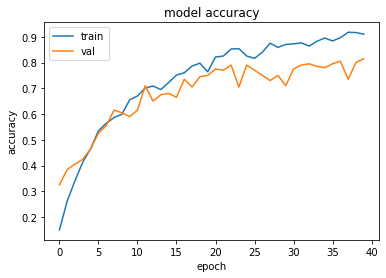

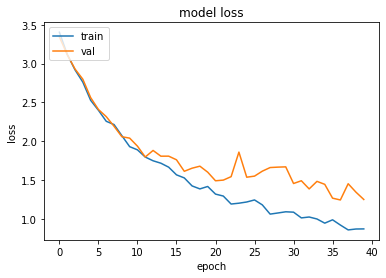

In [92]:
model.metrics_names
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

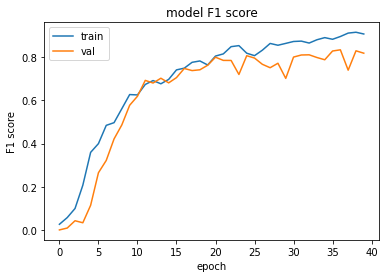

In [93]:
plt.plot(history.history['f1_m'])
plt.plot(history.history['val_f1_m'])
plt.title('model F1 score')
plt.ylabel('F1 score')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

[5 6 3 6 8 0 6 9 5 2 4 4 8 3 1 3 1 8 7 7 7 1 8 4 8 4 0 0 4 0 1 1 6 4 8 7 5
 2 3 7 1 0 9 5 2 6 0 9 0 8 2 7 7 5 0 7 6 0 8 5 5 7 5 2 0 9 5 8 6 9 4 8 9 1
 5 7 3 6 4 1 9 1 1 1 4 6 9 2 7 9 3 8 6 0 3 9 3 5 3 8 2 7 4 9 2 6 4 5 6 5 0
 3 6 8 0 1 6 1 7 1 9 8 9 2 4 9 9 4 2 3 1 6 9 1 0 6 8 0 0 9 0 6 5 0 8 8 3 0
 3 3 5 7 2 8 3 5 9 4 7 1 7 2 1 5 1 8 0 7 5 9 8 5 0 0 4 8 5 5 0 1 0 1 0 9 7
 6 2 8 4 4 7 8 2 9 7 3 7 7 6 3]
[5 6 5 9 5 0 6 6 5 2 4 4 8 3 1 4 9 9 7 7 7 1 4 4 0 4 0 0 4 0 1 5 6 4 8 7 5
 2 3 7 1 0 6 5 2 6 0 9 0 8 2 7 7 3 0 7 6 0 8 5 5 7 5 2 0 9 3 8 6 9 4 8 4 1
 5 7 3 6 7 1 9 0 1 1 8 6 9 2 2 2 3 8 6 0 3 6 5 8 3 8 2 7 4 9 3 6 4 5 6 5 0
 3 6 8 0 1 6 1 7 1 9 6 6 2 4 9 2 4 2 9 1 6 9 1 0 6 4 0 0 5 0 6 5 0 8 8 9 0
 3 3 8 7 2 8 3 3 9 4 7 1 7 8 1 5 1 8 4 7 5 9 4 5 0 0 4 8 5 5 0 1 0 1 0 9 7
 3 2 8 4 4 7 8 2 9 7 6 7 7 6 3]
confusion matrix
[[24  1  0  0  0  0  0  0  1  0]
 [ 0 18  0  0  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  1  0  2]
 [ 0  0  1 11  0  3  1  0  0  0]
 [ 1  0  0  1 15  0  0  0  3  1]
 [ 0

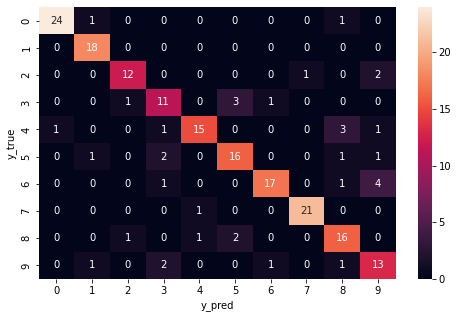

0.815

In [113]:
# pred = model.predict(X_test)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)
predictions_index = np.argmax(pred, axis=1)
print(predictions_index)
y_true = np.argmax(y_test, axis=1)
print(y_true)
cf = confusion_matrix(y_true, predictions_index)
print('confusion matrix')
print(cf)
    #confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
# accuracy
print("Accuracy:", compute_accuracy(y_true, y_pred))